In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate,Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier


In [2]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns


In [3]:
space_df=pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/train.csv',usecols = range(1,14))

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['Transported'] = le.fit_transform(space_df['Transported'].astype(str))

space_df = space_df

In [5]:
space_df = space_df.drop(['Name'], axis=1)

In [6]:
space_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [7]:
space_df = space_df.dropna(subset=['HomePlanet', 'Cabin','Destination'])

In [8]:
space_df.isnull().sum()

HomePlanet        0
CryoSleep       205
Cabin             0
Destination       0
Age             170
VIP             191
RoomService     168
FoodCourt       171
ShoppingMall    194
Spa             175
VRDeck          181
Transported       0
dtype: int64

In [8]:
space_df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int32
dtype: object

In [9]:
space_df = space_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
space_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0


In [10]:
objList = space_df.select_dtypes(include = "object").columns
print (objList)

Index(['HomePlanet', 'Cabin', 'Destination'], dtype='object')


In [11]:
space_df = pd.get_dummies(space_df, columns = ['HomePlanet', 'Destination'])
print(space_df)

      CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0         False     B/0/P  39.0  False          0.0        0.0           0.0   
1         False     F/0/S  24.0  False        109.0        9.0          25.0   
2         False     A/0/S  58.0   True         43.0     3576.0           0.0   
3         False     A/0/S  33.0  False          0.0     1283.0         371.0   
4         False     F/1/S  16.0  False        303.0       70.0         151.0   
...         ...       ...   ...    ...          ...        ...           ...   
8688      False    A/98/P  41.0   True          0.0     6819.0           0.0   
8689       True  G/1499/S  18.0  False          0.0        0.0           0.0   
8690      False  G/1500/S  26.0  False          0.0        0.0        1872.0   
8691      False   E/608/S  32.0  False          0.0     1049.0           0.0   
8692      False   E/608/S  44.0  False        126.0     4688.0           0.0   

         Spa  VRDeck  Transported  Home

In [12]:
objList = space_df.select_dtypes(include = "object").columns
print (objList)

Index(['Cabin'], dtype='object')


In [13]:
space_df

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0
8689,True,G/1499/S,18.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
8690,False,G/1500/S,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1
8691,False,E/608/S,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0


In [14]:
def split_cabin(x):
  if len(str(x).split('/')) < 3:
    return ['F', '82', "S"]
  else:   
    return str(x).split('/')

In [15]:
def preprocessing(df): 
  
  df['TempCabin'] = df['Cabin'].apply(lambda x: split_cabin(x))
  df['Deck'] = df['TempCabin'].apply(lambda x: x[0])
  df['num'] = df['TempCabin'].apply(lambda x: x[1])
  df['num'] = df['num'].astype('int')
  df['Deck'] = df['Deck'].astype('category').cat.codes
  df['Side'] = df['TempCabin'].apply(lambda x: x[2])
  df['Side'] = df['Side'].astype('category').cat.codes
  df.drop(['TempCabin', 'Cabin'], axis=1,inplace=True)
  return df

In [16]:
preprocessing(space_df)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1,5,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0,0,98,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,6,1499,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1,6,1500,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0,4,608,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['CryoSleep'] = le.fit_transform(space_df['CryoSleep'].astype(str))

space_df = space_df

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df['VIP'] = le.fit_transform(space_df['VIP'].astype(str))

space_df = space_df

In [19]:
space_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1,5,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0,0,98,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,6,1499,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1,6,1500,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0,4,608,1


In [20]:
space_df.columns.unique()

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck', 'num',
       'Side'],
      dtype='object')

In [21]:
# Split the data into train and test sets
y = space_df.pop('Transported')
X = space_df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=48)

# Reshape the input data
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# One-hot encode the target labels
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)




In [22]:
model = keras.Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], 1)))
model.add(Dense(1024, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 17)                0         
                                                                 
 dense (Dense)               (None, 1024)              18432     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [23]:
y_train

,0,1
4791,0,1
4053,1,0
932,1,0
7889,1,0
5490,1,0
...,...,...
2573,1,0
5972,0,1
1471,1,0
2807,1,0


In [24]:
def custom_LearningRate_schedular(epoch):
    if epoch < 5:
        return 0.01
    else:
        return 0.01 * tf.math.exp(0.1 * (10 - epoch))

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

def train_neural_network(model, x_train, y_train, x_test, y_test, save_to, epochs=2):
    """
    Trains a neural network model and saves the best performing model to a specified location.

    :param model: Neural network model to be trained.
    :type model: tensorflow.python.keras.engine.sequential.Sequential
    :param x_train: Training data.
    :type x_train: numpy.ndarray
    :param y_train: Training labels.
    :type y_train: numpy.ndarray
    :param x_test: Testing data.
    :type x_test: numpy.ndarray
    :param y_test: Testing labels.
    :type y_test: numpy.ndarray
    :param save_to: Path to save best performing model.
    :type save_to: str
    :param epochs: Number of epochs to train the model. Default is 2.
    :type epochs: int
    :return: Trained model and training history.
    :rtype: tuple
    """
    
    # Define optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    # Define early stopping callback
    #early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

    
    # Define model checkpoint callback to save best performing model
    model_checkpoint = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    
    # Define learning rate schedule callback
    learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
    
    # Compile model
    model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])
    #model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint, learning_rate_schedule])
    
    # Load best performing model
    saved_model = keras.models.load_model(save_to + '_best_model.h5')
    
    return saved_model, history

In [26]:
model,history = train_neural_network(model, X_train, y_train, X_test, y_test, save_to= './', epochs = 80) # original epoch=42

Epoch 1/80
204/204 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.6066
Epoch 1: val_accuracy improved from -inf to 0.76185, saving model to .\_best_model.h5
204/204 [==============================] - 5s 13ms/step - loss: 0.7041 - accuracy: 0.6066 - val_loss: 0.5227 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 2/80
204/204 [==============================] - ETA: 0s - loss: 0.6022 - accuracy: 0.6905
Epoch 2: val_accuracy improved from 0.76185 to 0.77231, saving model to .\_best_model.h5
204/204 [==============================] - 2s 10ms/step - loss: 0.6022 - accuracy: 0.6905 - val_loss: 0.5009 - val_accuracy: 0.7723 - lr: 9.0484e-04
Epoch 3/80
198/204 [============================>.] - ETA: 0s - loss: 0.5588 - accuracy: 0.7363
Epoch 3: val_accuracy improved from 0.77231 to 0.78769, saving model to .\_best_model.h5
204/204 [==============================] - 2s 11ms/step - loss: 0.5586 - accuracy: 0.7362 - val_loss: 0.4923 - val_accuracy: 0.7877 - lr: 8.1873e-04
Epoch

In [27]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 80.246%


51/51 [==============================] - 0s 3ms/step


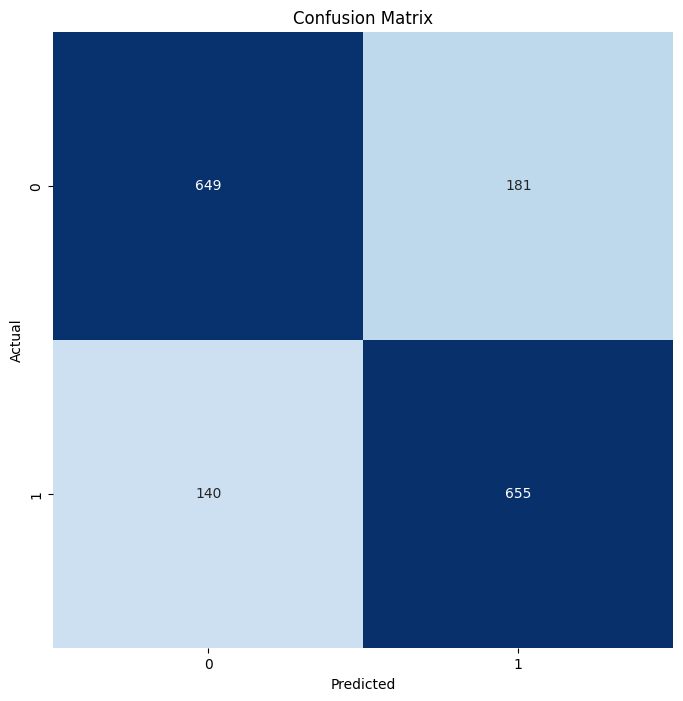

In [28]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print predicted labels
print(predicted_labels)

51/51 [==============================] - 0s 3ms/step
[1 1 1 ... 0 0 1]


In [30]:
space_df_test =pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/test.csv',usecols = range(1,13))
space_df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
space_df_test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [32]:
space_df_test = space_df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
space_df_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,Europa,False,D/297/P,TRAPPIST-1e,18.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [33]:
objList = space_df_test.select_dtypes(include = "object").columns
print (objList)

Index(['HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')


In [34]:
space_df_test = pd.get_dummies(space_df_test, columns = ['HomePlanet', 'Destination'])
print(space_df_test)

      CryoSleep     Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0          True     G/3/S  27.0  False          0.0        0.0           0.0   
1         False     F/4/S  19.0  False          0.0        9.0           0.0   
2          True     C/0/S  31.0  False          0.0        0.0           0.0   
3         False     C/1/S  38.0  False          0.0     6652.0           0.0   
4         False     F/5/S  20.0  False         10.0        0.0         635.0   
...         ...       ...   ...    ...          ...        ...           ...   
4272       True  G/1496/S  34.0  False          0.0        0.0           0.0   
4273      False   G/160/P  42.0  False          0.0      847.0          17.0   
4274       True   D/296/P  18.0  False          0.0        0.0           0.0   
4275      False   D/297/P  18.0  False          0.0     2680.0           0.0   
4276       True  G/1498/S  43.0  False          0.0        0.0           0.0   

         Spa  VRDeck              Name 

In [35]:
#space_df_test = space_df_test.drop(['Cabin'], axis=1)

In [36]:
space_df_test = space_df_test.drop(['Name'], axis=1)

In [37]:
objList = space_df_test.select_dtypes(include = "object").columns
print (objList)

Index(['Cabin'], dtype='object')


In [38]:
preprocessing(space_df_test)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1,6,160,0
4274,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0
4275,False,18.0,False,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,1,3,297,0


In [39]:
space_df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4273,False,42.0,False,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1,6,160,0
4274,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0
4275,False,18.0,False,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,1,3,297,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df_test['CryoSleep'] = le.fit_transform(space_df_test['CryoSleep'].astype(str))

space_df_test = space_df_test

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
space_df_test['VIP'] = le.fit_transform(space_df_test['VIP'].astype(str))

space_df_test = space_df_test

In [42]:
space_df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck,num,Side
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,3,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1,5,4,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,2,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1,2,1,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,6,1496,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,0,0,0,1,6,160,0
4274,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,3,296,0
4275,0,18.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,0,1,3,297,0


In [43]:
predictions = model.predict(space_df_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print predicted labels
print(predicted_labels)

134/134 [==============================] - 1s 3ms/step
[0 0 1 ... 1 1 1]


In [44]:
space_df_final = pd.read_csv('C:/Users/arun2/Downloads/spaceship-titanic/test.csv')

In [45]:
import pandas as pd

# Assuming you have obtained the predicted labels and passenger IDs
predicted_labels = np.argmax(predictions, axis=1)
passenger_ids = space_df_final['PassengerId']

transported_labels = predicted_labels.astype(bool)

# Create a DataFrame with passenger IDs and predicted labels
predictions_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': transported_labels})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)